# ¿Alcanza el salario? Un análisis de la canasta básica en las MIPYMES de La Habana

Actualmente, el precio de la vida en Cuba se ha convertido en una de las mayores incógnitas para el ciudadano. Con la irrupción de las Micro, Pequeñas y Medianas Empresas (MIPYMES) en el escenario minorista, la oferta de alimentos se ha estabilizado en los estantes, pero a precios que desafían constantemente el bolsillo del trabajador estatal. Este proyecto nace de una pregunta sencilla pero necesaria: ¿Cuánto de nuestro salario se queda realmente en la tablilla de precios de una MIPYME?

El objetivo de este análisis es calcular el costo real de una "canasta mínima" de 7 productos esenciales (arroz, azúcar, sal, frijoles, espagueti, salsa de tomate y aceite) en dos de los municipios con mayor actividad comercial de la capital: Plaza de la Revolución y Playa. Lo que buscamos con esto es una fotografía práctica de la realidad.

Para ello, hemos recopilado datos de 53 establecimientos entre los 2 municipios. Es importante notar que la disponibilidad es irregular; por eso, en nuestra base de datos, los productos ausentes se marcan como valores nulos, permitiéndonos trabajar solo con la oferta real existente.

Como punto de comparación, utilizaremos el salario medio de La Habana (6,449 CUP) según el último reporte de la ONEI. Al cruzar estos datos, intentaremos responder: ¿Es el salario una herramienta suficiente para acceder a la alimentación básica o es simplemente un punto de partida insuficiente? A través de visualizaciones y cálculos de promedios, veremos qué municipio trata "mejor" al consumidor y qué porcentaje del ingreso mensual se desvanece antes de llegar a casa.

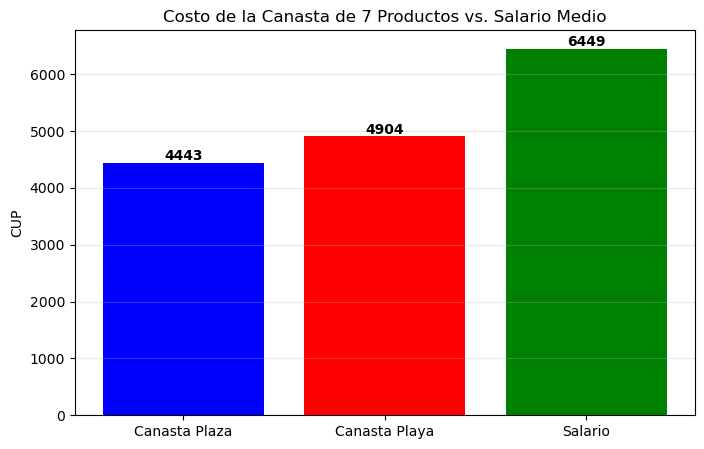

In [1]:
import src.icd_module as icd
import matplotlib.pyplot as plt

# Cargar la data de la ruta
datos = icd.cargar_datos("D:/Mis cosas/Proyecto/data/General.json")

# Lista de lo que voy a comprar
mis_productos = ["Arroz", "Azucar", "Sal", "Espagueti", "Salsa de tomate", "Aceite", "Frijoles"]

# Calculando costos y sacando el salario
c_plaza = icd.calcular_costo_canasta_basica(datos, 'plaza', mis_productos)
c_playa = icd.calcular_costo_canasta_basica(datos, 'playa', mis_productos)
sueldo = datos['salario_referencia']['valor']

# Datos para el gráfico
etiquetas = ['Canasta Plaza', 'Canasta Playa', 'Salario']
precios = [c_plaza, c_playa, sueldo]

plt.figure(figsize=(8, 5))
# poner los colores
plt.bar(etiquetas, precios, color=['blue', 'red', 'green'])

# Poner los valores arriba de las barras
for i in range(len(precios)):
    plt.text(i, precios[i] + 50, f'{int(precios[i])}', ha='center', weight='bold')

plt.title('Costo de la Canasta de 7 Productos vs. Salario Medio')
plt.ylabel('CUP')
plt.grid(axis='y', alpha=0.3)

plt.show()

   Como se aprecia en el gráfico anterior, la situación es crítica. El costo de una canasta de apenas 7 productos básicos en el municipio Playa (4,904.65 CUP) representa más del 76% del salario medio de un trabajador en La Habana. Incluso en Plaza, que resulta ligeramente más económico, el margen que queda para otros gastos esenciales como electricidad, transporte o aseo es mínimo. Esto confirma nuestra hipótesis inicial: el salario estatal ha perdido su función como garantía de consumo básico frente a los precios de las MIPYMES. También hay que tener en cuenta que solo analizamos el hecho de comprar una canasta básica en el mes, lo cual la verdad es bastante absurdo, porque solo incluiría una bolsa de arroz y un paquete de espagueti, lo cual no alcanzaría para alimentarse ni 3 días.

   Sin embargo, los promedios pueden ocultar realidades importantes. ¿Todos los establecimientos venden al mismo precio o hay mucha diferencia entre ellos? Para entender esto, analizaremos la dispersión de precios del arroz en ambos municipios. Este análisis nos permitirá ver si existe una competencia real que beneficie al consumidor o si los precios están estandarizados al alza

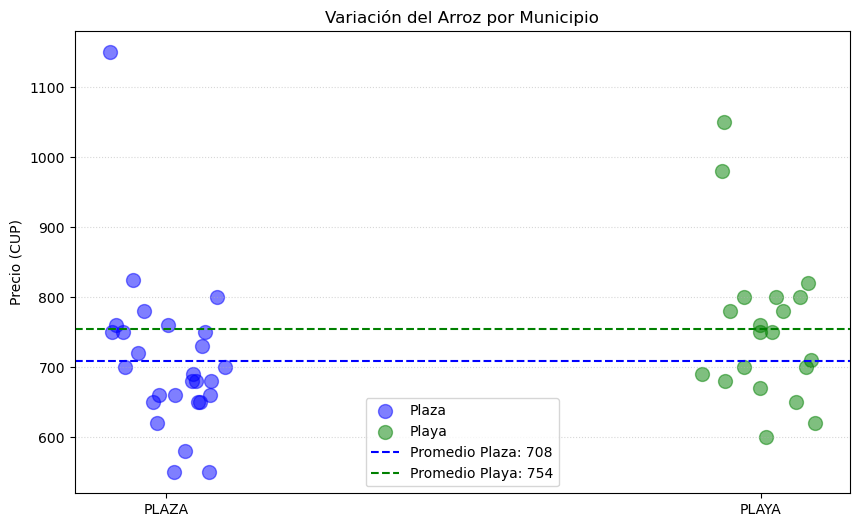

In [2]:
# Cargar los datos
m_plaza = icd.obtener_mipymes_por_municipio(datos, 'plaza')
m_playa = icd.obtener_mipymes_por_municipio(datos, 'playa')

precios_plaza = icd.obtener_precios_de_producto(m_plaza, 'Arroz')
precios_playa = icd.obtener_precios_de_producto(m_playa, 'Arroz')

# Calcular promedios
prom_plaza = icd.calcular_promedio(precios_plaza)
prom_playa = icd.calcular_promedio(precios_playa)

plt.figure(figsize=(10, 6))

import numpy as np
plt.scatter([1] * len(precios_plaza) + np.random.uniform(-0.1, 0.1, len(precios_plaza)),
            precios_plaza, color='blue', alpha=0.5, s=100, label='Plaza')

plt.scatter([2] * len(precios_playa) + np.random.uniform(-0.1, 0.1, len(precios_playa)),
            precios_playa, color='green', alpha=0.5, s=100, label='Playa')

# Líneas de promedio
plt.axhline(y=prom_plaza, color='blue', linestyle='--', label=f'Promedio Plaza: {int(prom_plaza)}')
plt.axhline(y=prom_playa, color='green', linestyle='--', label=f'Promedio Playa: {int(prom_playa)}')

# Detalles
plt.xticks([1, 2], ['PLAZA', 'PLAYA'])
plt.ylabel('Precio (CUP)')
plt.title('Variación del Arroz por Municipio')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend()

plt.show()

Este gráfico revela que el mercado de productos básicos en La Habana es altamente heterogéneo. Aunque el precio promedio del arroz es ligeramente superior en Playa (754 CUP) frente a Plaza (709 CUP), lo más preocupante es la enorme brecha de precios entre establecimientos: un mismo kilo de arroz puede costar desde 550 CUP hasta más de 1100 CUP en el mismo municipio. La presencia de valores atípicos tan elevados sugiere que el consumidor no solo enfrenta una inflación generalizada, sino también una falta de uniformidad que lo obliga a realizar una búsqueda constante para encontrar los precios más bajos y proteger su capacidad de compra

En Plaza: Los precios están más "apretados". La mayoría vende el arroz a un precio muy similar, lo que indica un mercado más estable o competitivo.

En Playa: Los puntos están más estirados verticalmente. Esto significa que si entras en la primera MIPYME que veas, tienes un alto riesgo de pagar mucho más que en la de la esquina siguiente.

Para entender la composición de la inflación, desglosamos la canasta. En el siguiente gráfico se muestra el precio promedio de cada producto. Esto permite identificar qué artículos específicos son los responsables de que el costo total de la canasta se dispare.

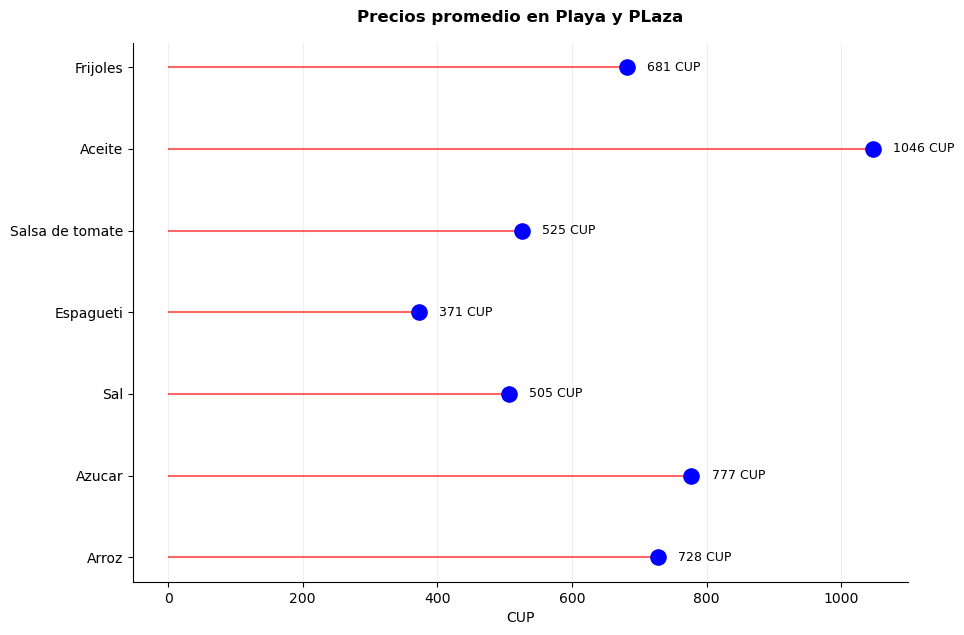

In [4]:
# Unimos los datos de los dos municipios para el análisis
municipios_total = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
mis_promedios = []

# Sacamos el promedio de cada producto
for p in mis_productos:
    lista_precios = icd.obtener_precios_de_producto(municipios_total, p)
    mis_promedios.append(icd.calcular_promedio(lista_precios))

# Graficamos
plt.figure(figsize=(10, 7))

# La linea y el punto al final
plt.hlines(y=mis_productos, xmin=0, xmax=mis_promedios, color='red', alpha=0.6)
plt.scatter(mis_promedios, mis_productos, s=120, color='blue', zorder=3)

# Poner los precios al lado de los puntos
for n in range(len(mis_promedios)):
    plt.text(mis_promedios[n] + 30, n, f'{int(mis_promedios[n])} CUP', va='center', fontsize=9)

# Estética y títulos
plt.title('Precios promedio en Playa y PLaza', pad=15, weight='bold')
plt.xlabel('CUP')
plt.grid(axis='x', alpha=0.2)

# Limpiar un poco el cuadro
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

Este ranking permite identificar los 'puntos de dolor' en el presupuesto familiar. Mientras que productos como el aceite dominan el gasto con un promedio de 1046 CUP, otros artículos tienen un impacto menor. Esta jerarquía de precios demuestra que la inflación no afecta por igual a todos los productos, y que el costo final de la canasta está fuertemente condicionado por apenas dos o tres productos críticos. Supongo que no podremos comprar más aceite si queremos comer más días.

El siguiente gráfico compara el precio más bajo y el más alto encontrados para cada producto. Esta visualización es vital para el consumidor, pues muestra que la diferencia entre comprar 'donde primero se vea' y buscar la mejor oferta puede significar un ahorro de cientos de pesos por cada artículo

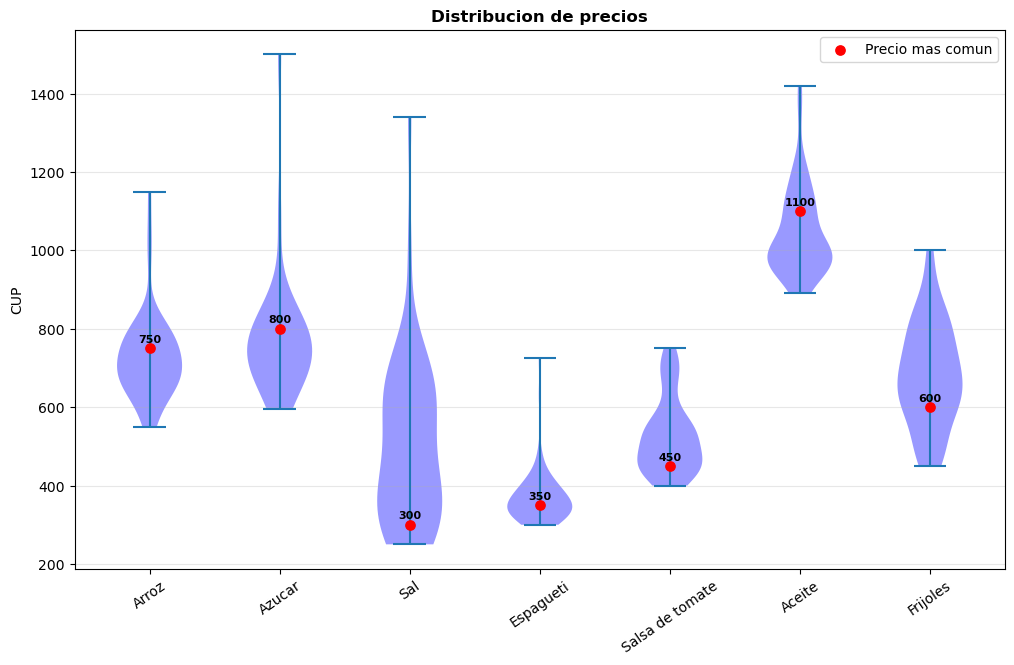

In [10]:
from collections import Counter

info_total = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')

datos_grafico = []
nombres = []
mis_modas = []

for p in mis_productos:
    # Traigo los precios y quito los nulos
    temp = [val for val in icd.obtener_precios_de_producto(info_total, p) if val is not None]

    if temp:
        datos_grafico.append(temp)
        nombres.append(p)
        # Saco la moda rapido con Counter
        moda_actual = Counter(temp).most_common(1)[0][0]
        mis_modas.append(moda_actual)

# El violin
plt.figure(figsize=(12, 7))
vplot = plt.violinplot(datos_grafico, showextrema=True)

# Color
for b in vplot['bodies']:
    b.set_facecolor('blue')
    b.set_alpha(0.4)

# Puntos rojos y moda
x = range(1, len(nombres) + 1)
plt.scatter(x, mis_modas, color='red', s=45, label='Precio mas comun', zorder=5)

# Pongo los numeros arriba de los puntos
for i, m in enumerate(mis_modas):
    plt.text(i + 1, m + 15, f'{int(m)}', ha='center', fontsize=8, weight='bold')

plt.title('Distribucion de precios', weight='bold')
plt.xticks(x, nombres, rotation=35)
plt.ylabel('CUP')
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.show()

Antes de concluir hagamos un experimento: ¿Podría sobrevivir un mes solo comiendo arroz?. Supongamos que eres un trabajador que cobra un salario promedio (6449 CUP) y decides gastarlo solamente en arroz, comprando siempre el más barato que encuentres. Para este experimento usaré mi situación personal: yo ingiero 0.5 kg de arroz diarios (media bolsa). Veremos si el salario alcanza para cubrir un mes de alimentación básica (15 kg de arroz) y qué porcentaje del salario representa ese "lujo"

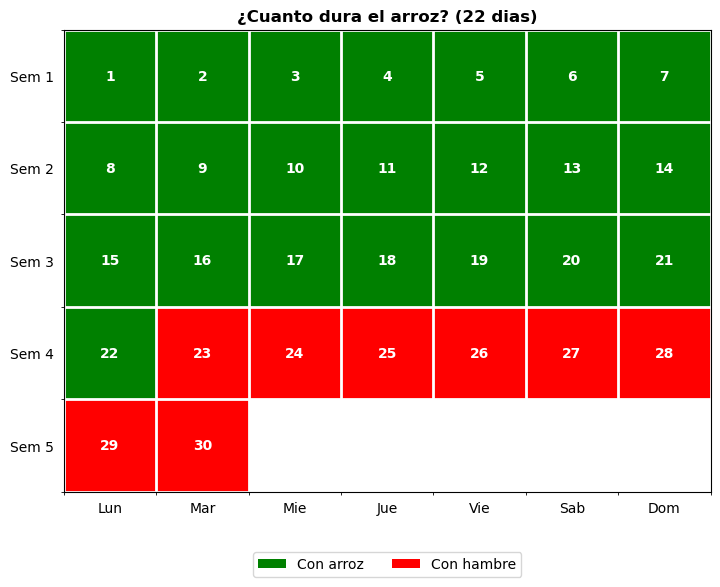

In [6]:
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

# Cargo los datos de nuevo por si acaso
info_total = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')

# Saco el arroz mas barato y veo cuanto me da el sueldo
precios_arroz = [p for p in icd.obtener_precios_de_producto(info_total, 'Arroz') if p is not None]
p_min = min(precios_arroz)
plata = datos['salario_referencia']['valor']

# Calculo de supervivencia (comiendo medio kilo al dia)
bolsas = int(plata // p_min)
dias_con_comida = int(bolsas / 0.5)

# Armo la lista para el calendario (30 dias + 5 de relleno para que sea 5x7)
# 1 = verde, 0 = rojo, -1 = gris
lista_dias = [1]*dias_con_comida + [0]*(30 - dias_con_comida) + [-1]*5
matriz = np.array(lista_dias).reshape(5, 7)

# Grafico
plt.figure(figsize=(9, 6))
# Colores
mis_colores = ListedColormap(['white', 'red', 'green'])

plt.imshow(matriz, cmap=mis_colores)

plt.title(f'¿Cuanto dura el arroz? ({dias_con_comida} dias)', weight='bold')
plt.xticks(range(7), ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom'])
plt.yticks(range(5), ['Sem 1', 'Sem 2', 'Sem 3', 'Sem 4', 'Sem 5'])

# Meto los numeros de los dias del 1 al 30
for d in range(30):
    plt.text(d % 7, d // 7, str(d+1), ha='center', va='center', color='white', weight='bold')

# Rejilla simple para que parezca un calendario
plt.gca().set_xticks(np.arange(-.5, 7, 1), minor=True)
plt.gca().set_yticks(np.arange(-.5, 5, 1), minor=True)
plt.grid(which='minor', color='white', lw=2)

# Quito las marcas de los ejes
plt.tick_params(left=False, bottom=False)

# Leyenda con colores normales
leyenda = [Patch(facecolor='green', label='Con arroz'),
           Patch(facecolor='red', label='Con hambre')]
plt.legend(handles=leyenda, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

El experimento demuestra que la "dieta" en Cuba es matemáticamente insostenible. Si el arroz más barato se consume el 100% del salario y aun asi nos pasamos 8 días sin comer, es evidente que el concepto de 'salario promedio' no está diseñado para la estructura de precios actual de las MIPYMES. Básicamente, si quieres comer arroz y además encender la luz de la casa, las cuentas no dan

Pero espera, quizás aún tengamos esperanza de sobrevivir. Ya vimos que el arroz nos deja en ayuno antes de terminar el mes. Pero, ¿qué pasa si cambiamos de estrategia? El espagueti es el otro gran pilar de la dieta rápida. Según mis datos, yo consumo 250 g diarios (medio paquete de 500 g). Vamos a calcular si con el salario promedio y buscando el espagueti más barato, logramos llegar al día 30.

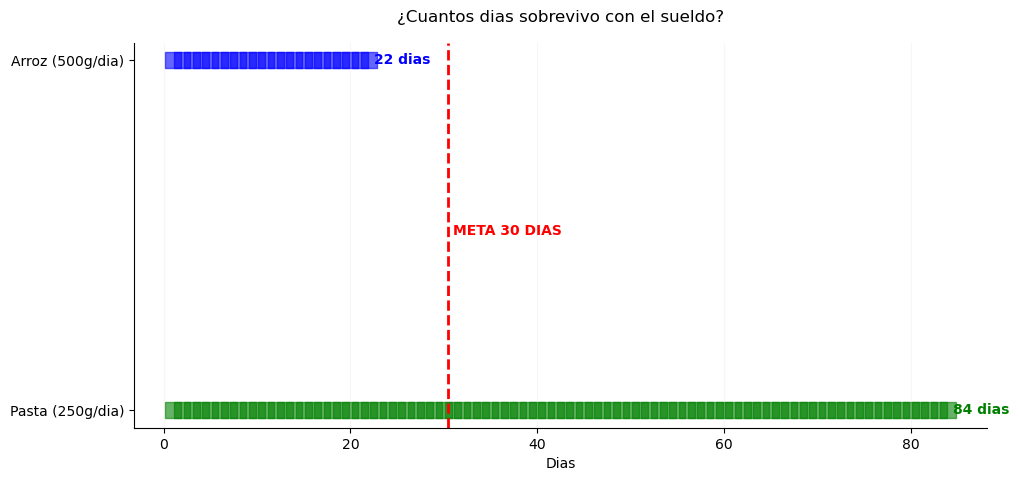

Con arroz: 22 dias. Con pasta: 84 dias.


In [7]:
# Junto los datos de Plaza y Playa
datos_completos = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')
sueldo_ref = datos['salario_referencia']['valor']

# Calculo para el Arroz (comiendo 500g)
precios_arroz = icd.obtener_precios_de_producto(datos_completos, 'Arroz')
dias_con_arroz = int((sueldo_ref // min(precios_arroz)) / 0.5)

# Calculo para el Espagueti (comiendo 250g)
precios_pasta = icd.obtener_precios_de_producto(datos_completos, 'Espagueti')
dias_con_pasta = int((sueldo_ref // min(precios_pasta)) / 0.25)

# Empiezo el grafico
plt.figure(figsize=(11, 5))

# Arroz en azul, Pasta en verde
plt.scatter(range(1, dias_con_arroz + 1), [1] * dias_con_arroz,
            marker='s', s=130, color='blue', alpha=0.6, label='Arroz')

plt.scatter(range(1, dias_con_pasta + 1), [0] * dias_con_pasta,
            marker='s', s=130, color='green', alpha=0.6, label='Espagueti')

# La linea de los 30 dias para ver quien llega
plt.axvline(x=30.5, color='red', linestyle='--', linewidth=2)
plt.text(31, 0.5, 'META 30 DIAS', color='red', weight='bold')

# Etiquetas de los lados
plt.yticks([0, 1], ['Pasta (250g/dia)', 'Arroz (500g/dia)'])
plt.title('¿Cuantos dias sobrevivo con el sueldo?', pad=15)
plt.xlabel('Dias')

# Pongo el numero total al final de cada fila
plt.text(dias_con_arroz + 0.5, 1, f'{dias_con_arroz} dias', color='blue', weight='bold', va='center')
plt.text(dias_con_pasta + 0.5, 0, f'{dias_con_pasta} dias', color='green', weight='bold', va='center')

# Arreglos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='x', alpha=0.1)

plt.show()

print(f"Con arroz: {dias_con_arroz} dias. Con pasta: {dias_con_pasta} dias.")

Los datos nos dan una sorpresa: mientras el arroz nos deja "colgados" a mitad de mes, el espagueti se revela como el verdadero aliado de la supervivencia. Comiendo solo pasta podríamos estirar el salario hasta los 84 días. Esto lo cambia todo, si nuestra meta inicial es solo sobrevivir 30 días, nos sobra presupuesto para dejar de comer solo espagueti y comprar salsa de tomate, sal o algún acompañamiento.

Al parecer todavía hay esperanza para el trabajador promedio... al menos hasta que recordamos que también hay que pagar la corriente, el gas y el agua. Pero hey, ¡al menos el hambre no nos sacará del juego antes de tiempo!

Por si tenías curiosidad de cuánto costaría comprar un solo ejemplar de cada producto de la canasta analizada frente al salario... bueno, aquí los datos nos muestran la realidad

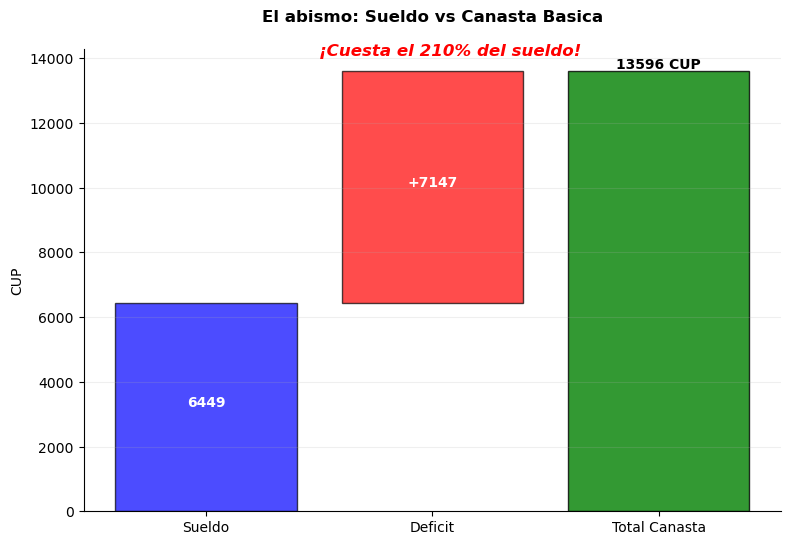

In [9]:
# Saco los nombres de la canasta y los precios de una
canasta = [item['producto'] for item in datos['canasta_basica']]
info = icd.obtener_mipymes_por_municipio(datos, 'plaza') + icd.obtener_mipymes_por_municipio(datos, 'playa')

precios_finales = []
for p in canasta:
    precios = [v for v in icd.obtener_precios_de_producto(info, p) if v is not None]
    if precios:
        precios_finales.append(np.mean(precios))
    else:
        precios_finales.append(0)

# Calculos
total_comida = sum(precios_finales)
sueldo = datos['salario_referencia']['valor']
lo_que_falta = total_comida - sueldo

# Grafico
plt.figure(figsize=(9, 6))

# Bloque 1: El sueldo (Azul)
plt.bar('Sueldo', sueldo, color='blue', alpha=0.7, edgecolor='black')

# Bloque 2: El deficit (Rojo) (en el aire)
plt.bar('Deficit', lo_que_falta, bottom=sueldo, color='red', alpha=0.7, edgecolor='black')

# Bloque 3: El costo total
plt.bar('Total Canasta', total_comida, color='green', alpha=0.8, edgecolor='black')

# Pongo los valores encima de cada bloque
plt.text(0, sueldo/2, f'{int(sueldo)}', ha='center', color='white', weight='bold')
plt.text(1, sueldo + (lo_que_falta/2), f'+{int(lo_que_falta)}', ha='center', color='white', weight='bold')
plt.text(2, total_comida + 100, f'{int(total_comida)} CUP', ha='center', weight='bold')

plt.title('El abismo: Sueldo vs Canasta Basica', pad=20, weight='bold')
plt.ylabel('CUP')
plt.grid(axis='y', alpha=0.2)

# Un comentario
porcent = (total_comida / sueldo) * 100
plt.text(0.5, total_comida + 500, f'¡Cuesta el {int(porcent)}% del sueldo!',
         color='red', weight='bold', fontsize=12, style='italic')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# Conclusion:Lo que me enseñaron los datos

Después de pasar días procesando estos precios, la verdad es que me quedo con una mezcla de sorpresa y preocupación. Al principio esto era solo un trabajo de programación, pero ver ese gráfico de pastel devorándose el salario promedio solo con 7 productos me dio un golpe de realidad: el sueldo hoy en Cuba no es un ingreso, es un cronómetro que corre en contra de la comida. El mercado es un caos total, y esa brecha enorme de precios que encontramos en el arroz demuestra que si no sales a caminar y a 'luchar' el precio, te estás hundiendo tú mismo.

Mi pequeño experimento con el espagueti me dio algo de risa y alivio a la vez. Es curioso que la 'esperanza' de un trabajador sea vivir a base de pasta para llegar a los 30 días, pero ahí están los datos: o somos matemáticos para optimizar cada gramo que ingerimos, o las cuentas simplemente no dan. Al final, este trabajo me enseñó que en La Habana de 2026, sobrevivir es el algoritmo más complejo que nos toca resolver cada mes. Esperanza hay, pero raciónala bien, porque como incluya la cuenta de la luz, ni el espagueti nos salva.